In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv


# Team Members

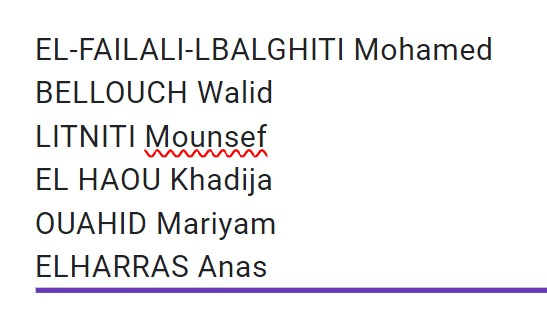

# <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;">**Gathering the required libraries**</p>  

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

data = pd.read_csv('../input/airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [6]:
data.shape

(5268, 13)

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.0,27.554518,43.076711,0.0,5.0,13.0,30.0,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.0,9.0,23.0,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.0,0.0,0.0,2750.0


 # <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;"> EDA : Data Cleaning</p>  

## Checking for missing values

In [5]:
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

**"Flight #" column null values are more than 50% let's drop column**

In [24]:
data.drop('Flight #', axis=1,inplace=True)

In [ ]:
data.Location.replace(np.nan, 'Unknown', inplace= True)
data.Operator.replace(np.nan, 'Unknown', inplace= True)
data.Type.replace(np.nan, 'Unknown', inplace= True)


**Through inspection, we found that missing values are present but employing feature engineering techniques and neglecting the features of less interest can result in good results.**

In [7]:
#cleanup
data['Time'] = data['Time'].replace(np.nan, '00:00') 
data['Time'] = data['Time'].str.replace('c: ', '')
data['Time'] = data['Time'].str.replace('c:', '')
data['Time'] = data['Time'].str.replace('c', '')
data['Time'] = data['Time'].str.replace('12\'20', '12:20')
data['Time'] = data['Time'].str.replace('18.40', '18:40')
data['Time'] = data['Time'].str.replace('0943', '09:43')
data['Time'] = data['Time'].str.replace('22\'08', '22:08')
data['Time'] = data['Time'].str.replace('114:20', '00:00')


# multiply two columns to create another one
data['Time'] = data['Date'] + ' ' + data['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
data['Time'] = data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(data.Time.min()) + ' to ' + str(data.Time.max())) 

data.Operator = data.Operator.str.upper() #to avoid duplicates.

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [13]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [25]:
data.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

# <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;">Visualizing the Data</p>  

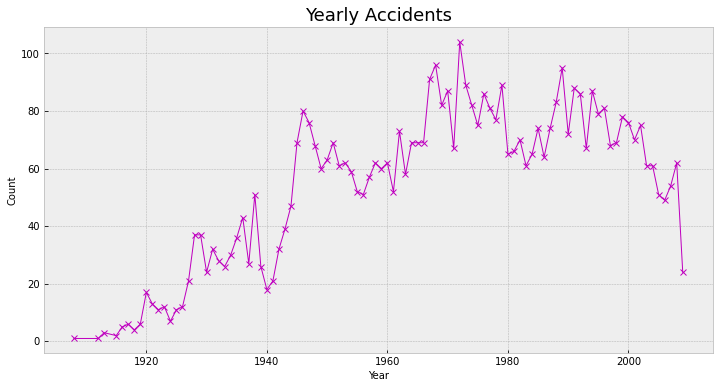

In [11]:
Temp = data.groupby(data.Time.dt.year)[['Date']].count()
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(Temp.index, 'Count', data=Temp, color='m', marker = "x", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Yearly Accidents', loc='Center', fontsize=18)
plt.show()

## Are there specific periods with higher or lower crash rates?
## Is the crashes passed in the summer more than other seasons?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


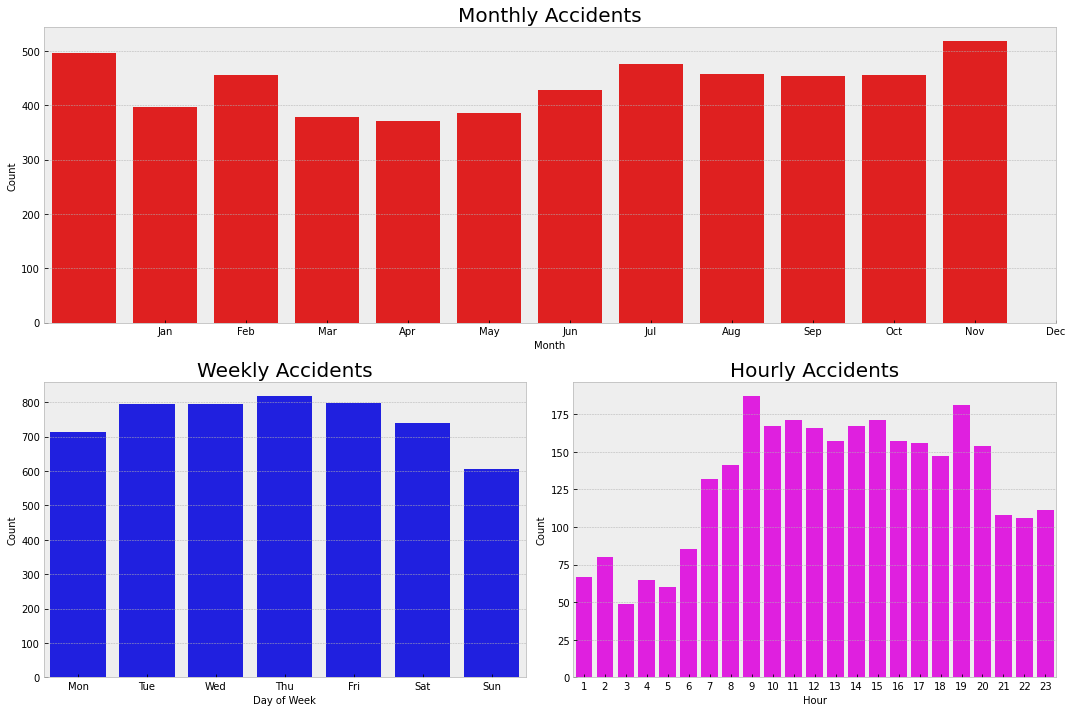

In [14]:

import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(data.groupby(data.Time.dt.month)[['Date']].count().index, 'Date', data=data.groupby(data.Time.dt.month)[['Date']].count(), color='red', linewidth=2)
plt.xticks(data.groupby(data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Monthly Accidents', loc='Center', fontsize=20)

ax = pl.subplot(gs[1, 0])
sns.barplot(data.groupby(data.Time.dt.weekday)[['Date']].count().index, 'Date', data=data.groupby(data.Time.dt.weekday)[['Date']].count(), color='blue', linewidth=2)
plt.xticks(data.groupby(data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Weekly Accidents', loc='Center', fontsize=20)

ax = pl.subplot(gs[1, 1])
sns.barplot(data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count().index, 'Date', data=data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count(),color ='magenta', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Hourly Accidents', loc='Center', fontsize=20)
plt.tight_layout()
plt.show()

# **Military Vs Commericial Flights**

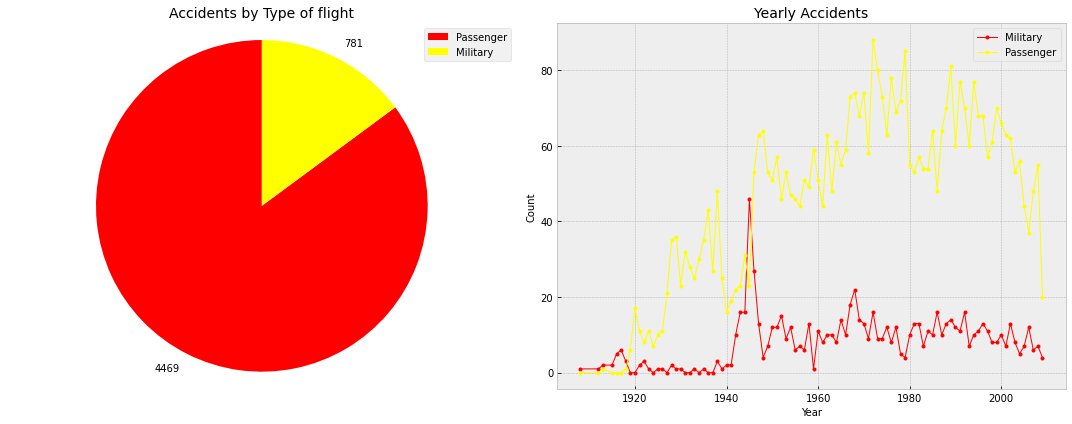

In [16]:
Temp = data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['red', 'yellow']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='red', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellow', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Yearly Accidents', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

# **Total Fatalities**

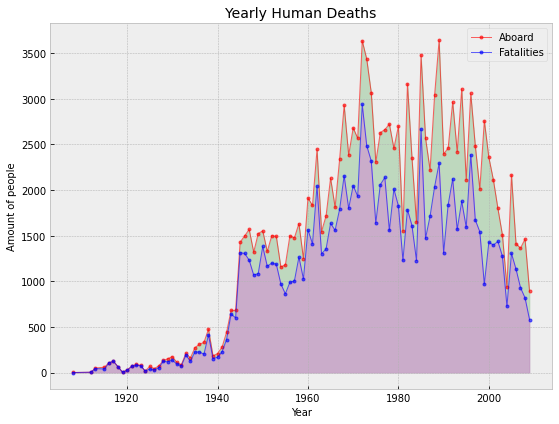

In [18]:
Fatalities = data.groupby(data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="green", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="red", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="magenta", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="blue", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Yearly Human Deaths', loc='Center', fontsize=14)

# plt.subplot(1, 2, 2)
# plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
# plt.xlabel('Year', fontsize=10)
# plt.ylabel('Ratio', fontsize=10)
# plt.title('Fatalities Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

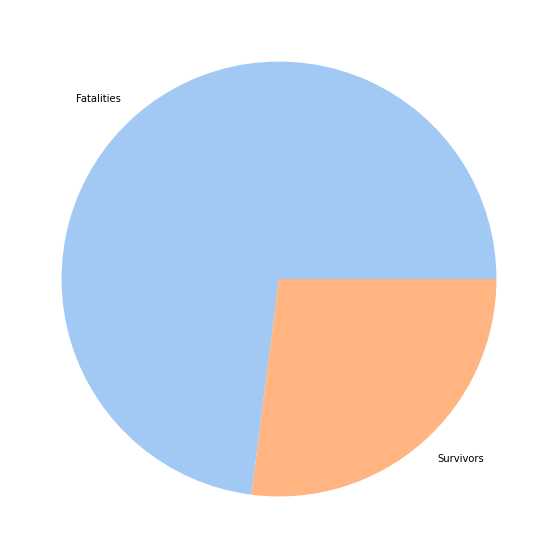

In [28]:
sns.set_palette('pastel')
plt.figure(figsize=(12,10))
Aboard = data.Aboard.sum()
Fatalities = data.Fatalities.sum()
Survivors = Aboard - Fatalities

y = np.array([Fatalities, Survivors])
mylabels = ["Fatalities", "Survivors"]

plt.pie(y, labels = mylabels)
plt.show()

### * If a Crash passed the most of travels die

## airplane models and crushes¶
## Which airports have experienced the most incidents? ,<hr>

In [34]:
df_fatal = data.groupby('Type')[['Fatalities']].sum()
df_fatal.head(3)

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0


In [37]:
df_fatal = df_fatal.rename(columns={'Type': 'Fatalities'})
df_type_fatal = df_fatal.sort_values(by='Fatalities', ascending=False)
df_type_fatal_top10 = df_fatal.head(10) 
df_type_fatal_top10.head(2)

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0


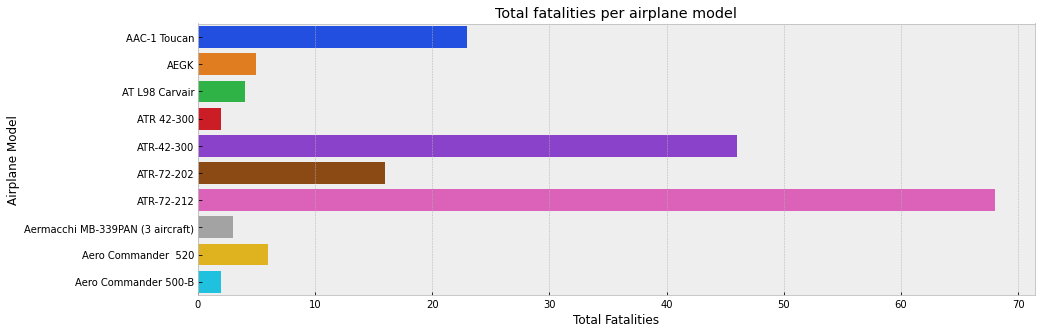

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_type_fatal_top10.index, x="Fatalities", data=df_type_fatal_top10, palette="bright")
plt.xlabel('Total Fatalities')
plt.ylabel('Airplane Model')
plt.title('Total fatalities per airplane model')
plt.show()

## airplane models and crushes


In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_type_fatal_top10.index, x="Fatalities", data=df_type_fatal_top10, palette="bright")
plt.xlabel('Total Fatalities')
plt.ylabel('Airplane Model')
plt.title('Total fatalities per airplane model')
plt.show()

## total death per airplane crushes

In [44]:
data["Total Death"] = data["Fatalities"] + data["Ground"]
data.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Total Death
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,5.0
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1.0
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,14.0
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,30.0


In [45]:
df_death_airline = data.groupby('Operator')[['Total Death']].sum() 
df_death_airline = df_death_airline.rename(columns={"Operator": "Total Death"})
df_death_airline = df_death_airline.sort_values(by='Total Death', ascending=False)
df_death_airline_top10 = df_death_airline.head(10)

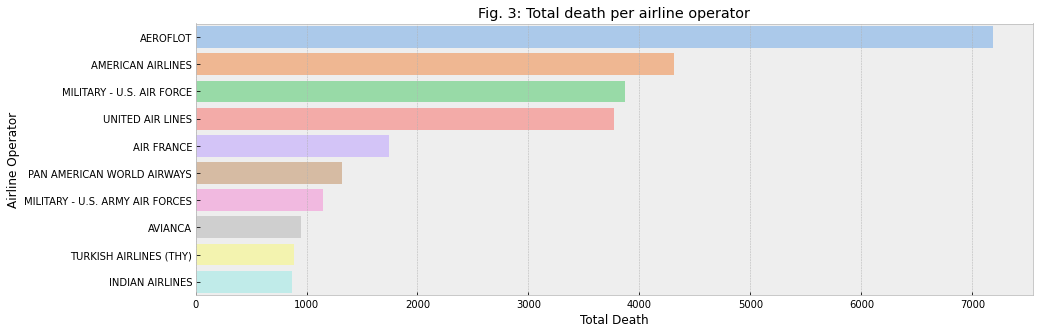

In [46]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_death_airline_top10.index, x="Total Death", data=df_death_airline_top10, palette="pastel")
plt.xlabel('Total Death')
plt.ylabel('Airline Operator')
plt.title('Fig. 3: Total death per airline operator')
plt.show()

<p style="font-size:160%; background-color:powderblue;">It looks like Aeroflot has the most number of accident for all the time.</p>

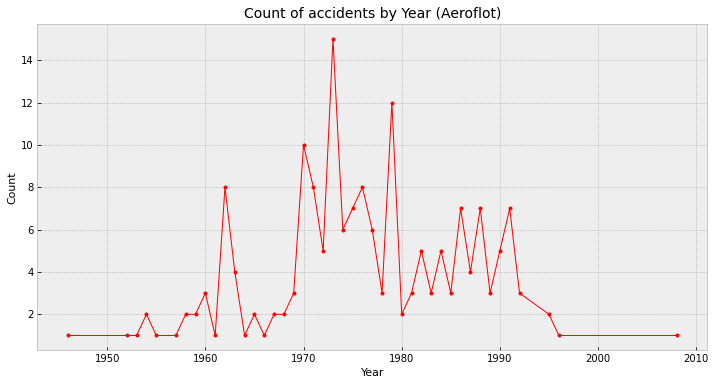

In [72]:
Aeroflot = data[data.Operator == 'AEROFLOT']

Count_by_Year = Aeroflot.groupby(data.Time.dt.year)[['Date']].count()
Count_by_Year = Count_by_Year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by Year (Aeroflot)', loc='Center', fontsize=14)
plt.show()

<p style="font-size:160%; background-color:powderblue;">It seems like 1970s were not the best year in history of Aeroflot. </p>

<p style="font-size:160%">Participate in cold war 1947 - 1991</p>
<p style="font-size:160%; background-color:powderblue;">More data in : https://en.wikipedia.org/wiki/Aeroflot</p>

# 4.7 Summary Column¶

## Exploring


In [48]:
# Create a copy of the DataFrame
df_summ = data.copy()

# Import the 're' module for regular expressions

import re

# Define a function to remove special characters from a string
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]+', '', str(text))

# Apply the 'remove_special_characters' function to the 'Summary' column
df_summ['Summary'] = df_summ['Summary'].apply(remove_special_characters)

In [50]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Removing special characters from the 'Summary' column
special_chars = ["#", "@", "_", "?", "؟", "!", "&", "%", ")", "(", "\\", "/", "\"", "|", "=", "٪", ".", "”", ":", "-", "*", ","]
for char in special_chars:
    df_summ['Summary'] = df_summ['Summary'].str.replace(char, " ")

# Adding English stopword set
stop_words_list = set(stopwords.words('english'))

# Tokenize, lower-case, and remove nulls
words = word_tokenize(" ".join(df_summ.Summary.dropna().astype(str).str.lower()))

# Remove stopwords and non-alphabetic words from the summary
wordsNoSW = [word for word in words if word not in stop_words_list and word.isalpha()]

# Count the frequency of words in the combined sentences
top20 = Counter(wordsNoSW).most_common(20)
top20

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


[('crashed', 3214),
 ('aircraft', 2389),
 ('plane', 1835),
 ('flight', 1050),
 ('pilot', 1013),
 ('approach', 941),
 ('engine', 921),
 ('runway', 914),
 ('failure', 878),
 ('crew', 751),
 ('landing', 732),
 ('airport', 624),
 ('weather', 605),
 ('altitude', 598),
 ('takeoff', 574),
 ('mountain', 556),
 ('conditions', 540),
 ('taking', 534),
 ('land', 522),
 ('struck', 510)]

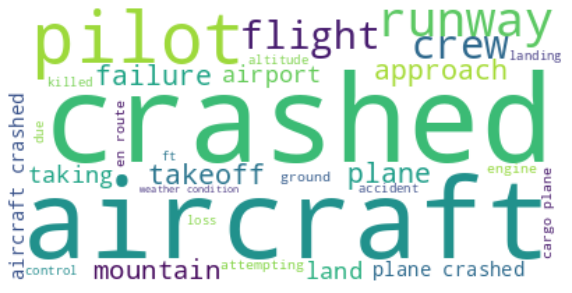

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert 'Summary' column to a single string
text = " ".join(summary for summary in df_summ.Summary.dropna())

# Create the WordCloud object with specified parameters
wordcloud = WordCloud(stopwords=stop_words_list, background_color="white", max_words=30).generate(text)

# Set up the plot figure
plt.figure(figsize=(10, 6))

# Display the WordCloud image using imshow
plt.imshow(wordcloud, interpolation="bilinear")

# Remove axis
plt.axis("off")

plt.show()

## Crash causation:
## What are the common causes or factors contributing to airplane crashes?

In [52]:
# Define the keyword categories
weather_cause = ["weather","fog", "mist", "weat","weather conditions","haze", "visibility", "wind", "winds", "thunderstorm", "storm", "rain",
                 "snow", "ice", "icing", "lightning.", "lightning", "turbulence", "wind shear", "gusty winds"]

pilot_cause = ["pilot error", "crashed", "pilot's error",  "vfr","VFR", "pilot mistake", "pilot's mistake", "pilot fatigue",
               "pilot negligence","Midair collisioin","crew","Failed to gain altitude","attempting to land", "crew error", "crew's error", "crew mistake", "crew's mistake", "crew fatigue", "crew negligence"]

mech_cause = ["engine failure", "equipment failure", "engine malfunction", "equipment malfunction", "mechanical failure",
              "mechanical", "malfunction", "component", "landing gear", "flight control", "mechanical", "malfunction",
              "landing gear", "propeller failure", "power loss", "engine problems", "engine trouble", "engine issues",
              "engine defect", "engine failed","engine broke", "engine shutdown", "engine burst", "engine exploded", "fire", "flames",
              "burned", "Stalled at low altitiude", "Hydrogen gas","burning", "fuel leak", "failed.", "fuel exhaustion",  "out of fuel", "low fuel", "maintenance error",
              "improper repair", "overlooked fault", "structural failure", "airframe", "fatigue", "in-flight breakup",
              "systems failure", "rear engine","small knoll tearing","Fuselage failure","starboard","navigation failure", "fuel", "loss", "broken", "communication failure"]

attack_cause = ["shot down", "shotdown", "down by", "missile", "by British aircraft", "anti-aircraft", "exploded",
                "shot at", "struck by missile", "hit by missile", "sabotage", "terrorism", "bomb", "explosive", "hijack"]

other_cause = ["weight imbalance", "rapid decompression", "drone collision", "medical emergency", "pilot incapacitated",
               "heart attack", "medical issue", "A navigational error","bird strike", "bird hit", "bird collision", "air traffic control error",
               "runway","Forced landing","forward emergency exit","Cashed into trees shortly after taking off","miscommunication", "atc mistake","atc error"]

# Define a function to categorize the cause based on keywords
def categorize_cause(text):
    if any(keyword in text.lower() for keyword in weather_cause):
        return "Weather"
    elif any(keyword in text.lower() for keyword in pilot_cause):
        return "Pilot Error"
    elif any(keyword in text.lower() for keyword in mech_cause):
        return "Mechanical Failure"
    elif any(keyword in text.lower() for keyword in attack_cause):
        return "Attack"
    elif any(keyword in text.lower() for keyword in other_cause):
        return "Other"
    else:
        return "Unknown"

# Apply the categorize_cause function to the 'Summary' column to create a new 'Cause' column
df_summ['Cause'] = df_summ['Summary'].apply(categorize_cause)

# Display the count of each cause category
print(df_summ['Cause'].value_counts())

Pilot Error           2035
Weather               1880
Unknown                872
Mechanical Failure     295
Attack                 119
Other                   67
Name: Cause, dtype: int64


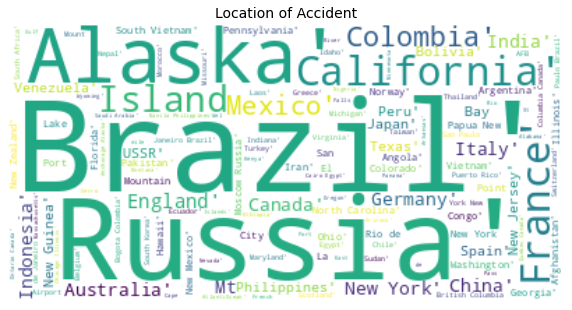

In [69]:
text = str(data.Location.tolist())

stop_words_list.add('nan')
stop_words_list.add('Near')

wc = WordCloud(background_color="white", max_words=2000, stopwords=stop_words_list)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Location of Accident', loc='Center', fontsize=14)
plt.show()

## Air Traffic Volume for Russa
## Geographical and Weather Conditions Brazil and Russa
## Infrastructure and Safety Standards for Brazil

 # <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;">Conclusion</p>  

* ## Pilote error and weather are the most causal of accidents
* ## If a Crash passed the most of travels die
* ## We can't said that The Most crashes happen in the summer!
* ## The civils airplans make more accident than military
* ## somes airplans crashed more than others (Dauglas....)
* ## Some airplans operator cause death more than other( AEROFLOT .... )

 # <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;">Visualisation in the web Using Geo API & ThreeJS</p>  

# [Show Live : WebSite link](https://team14_cec.surge.sh/)

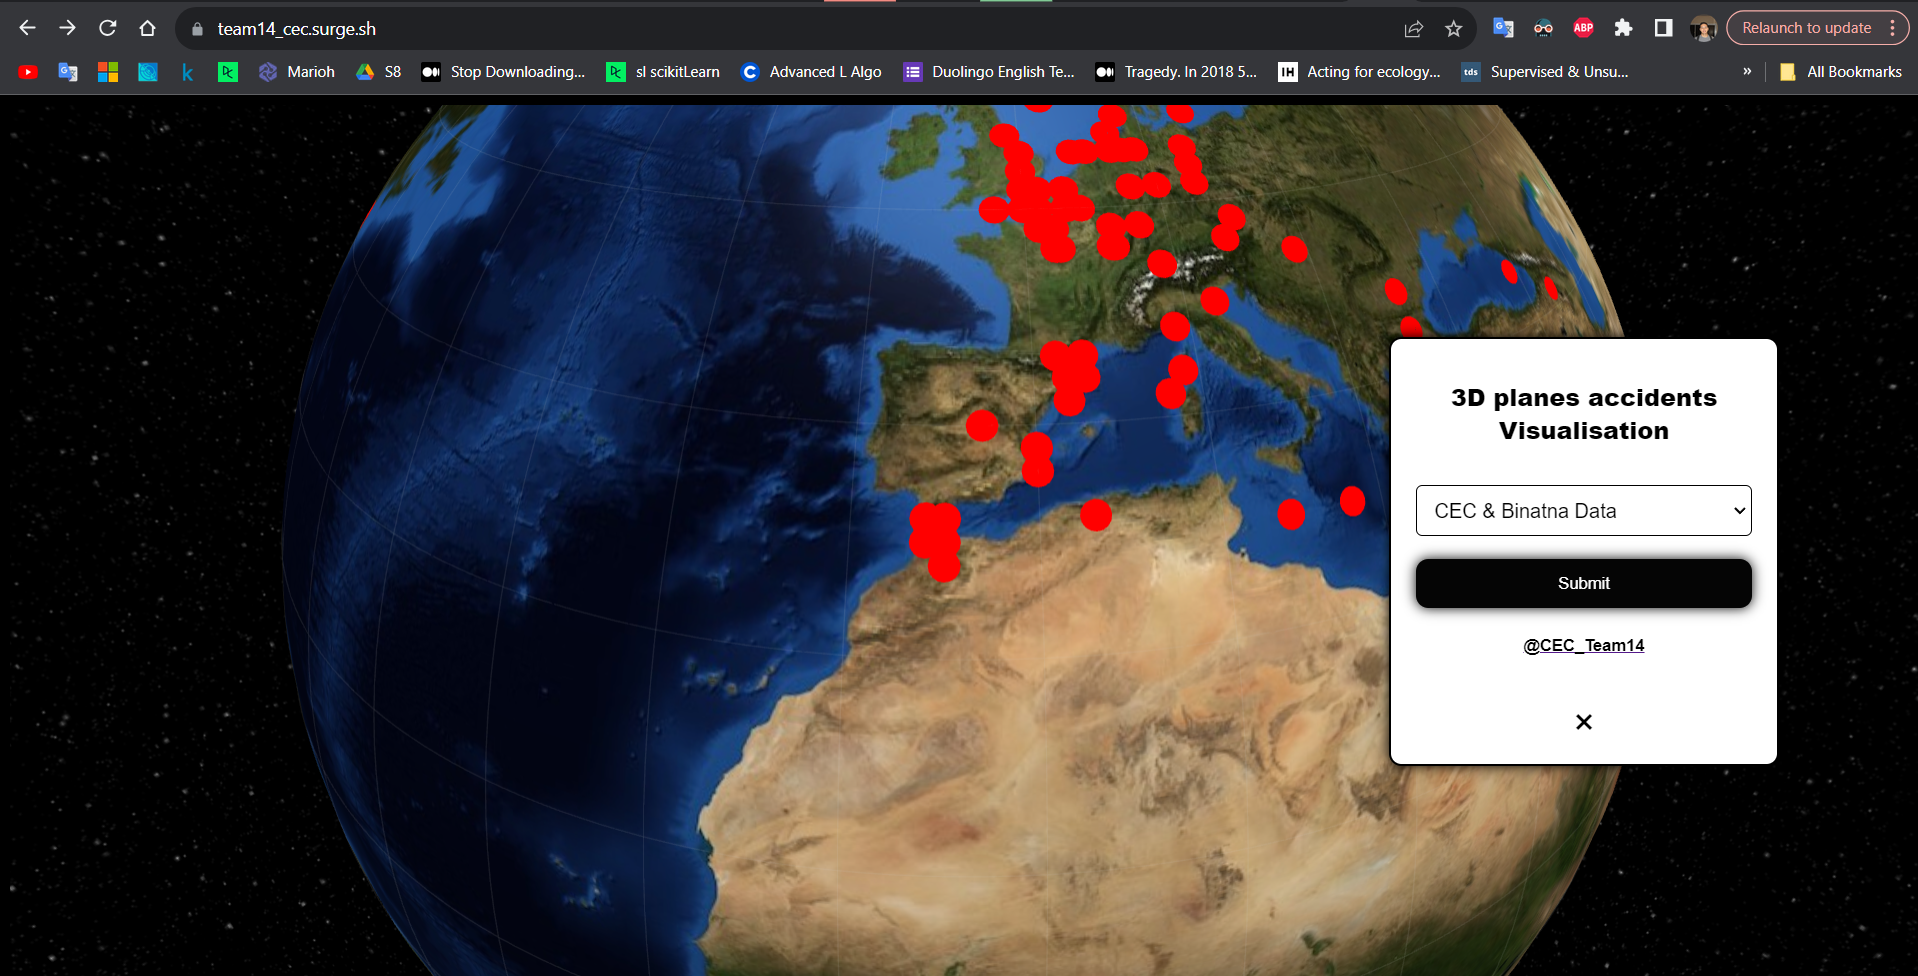